## 3 - Regressão Logística

## Carrega base ex2data1.txt

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import pandas as pd

DATA_BASE = "am-T1-dados"

# 3.1 Visualiza¸c˜ao dos dados

def load_student_grade(properties_sell=DATA_BASE):
    os.makedirs(properties_sell, exist_ok=True)
    txt_path = os.path.join(properties_sell, "ex2data1.txt")
    return np.loadtxt(txt_path, delimiter=",")

### Nessa primeira parte, carregamos o dataset com scores de uma determinada matéria  

## - Visualização dos dados


### Aqui pode se visualizar os dados onde a cruz representa a nota dos alunos adimitidos e bola amarela para os não adimitidos 

Text(0, 0.5, 'Exam 2 Score')

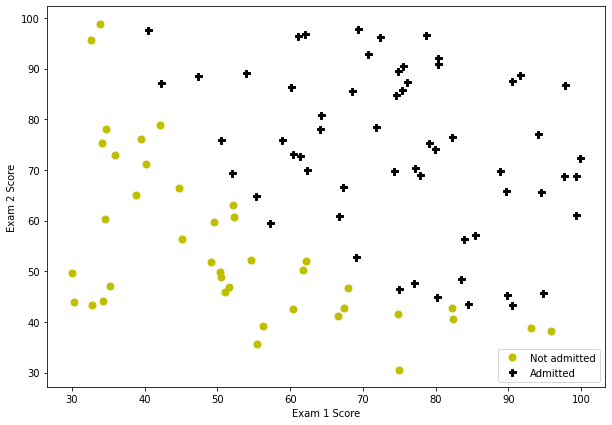

In [7]:

data = load_student_grade()

values = data[:,:2]
clasz  = data[:,2]

pos = data[np.where(clasz == 0)]
neg = data[np.where(clasz == 1)]

plt.figure(figsize=(10, 7))
plt.plot(pos[:,0], pos[:,1],'y.',marker='o',markersize=7, label="Not admitted");
plt.plot(neg[:,0], neg[:,1],'k.', marker='P',markersize=7, label="Admitted");
plt.legend(loc=4)
plt.xlabel("Exam 1 Score", fontsize=10)
plt.ylabel("Exam 2 Score", rotation=90, fontsize=10)

## Implementação

###  Função sigmoide

### A funcao sigmoide representa valores que para dado um valor de entrada vão gerar um valor de saida que sera em um range de 0 a 1 .Caso ultrapasse um determinado  limiar teremos uma classificacao. Exemplo: > 0.5 

In [8]:

import numpy as np

def sigmoide(z):
    return 1 / (1 + np.exp(-z)) 

### 3.2.2 - Função de custo e gradiente

In [9]:
#3.2.2 Função de custo e gradiente
import numpy as np
import sigmoide as si


def funcaoCustoRegressaoLogistica(theta, z, labels_norm):
    y = labels_norm
    m = len(y)
    term_1 = y * np.transpose(np.log(sigmoide(np.dot(z,theta)))) 
    term_2 = (1-y)* np.transpose(np.log(1-sigmoide(np.dot(z,theta))))
    
    return - 1/m * (term_1 + term_2).sum()

#### A função de custo  utiliza a formula abaixo:
#### É necessário a função de sigmoide que coloca os valores dentro de um range de 0 e 1 onde se pode ober a probabilidade de uma classe ser identificada

![text](img/custo_l.png)   

#### O codigo do gradiente é refletido abaixo :

In [10]:
import numpy as np
import custo_reglog as cr
import sigmoide as si



def gd_reglog(theta,exam_norm,clasz):
    learning_rate = 0.5
    iter = 500
    y = clasz
    m = len(y)

    new_custo = 0

    for i in range(iter):   
        grad = (1./m) * np.dot(si.sigmoide( np.dot(exam_norm,theta) ).T - y, exam_norm).T 
        theta = theta - learning_rate * grad
        new_custo = funcaoCustoRegressaoLogistica(theta,exam_norm, clasz)
    return theta


![text](img/grad_log.png)   

### Onde a resolução da derivada é igual a :
![text](img/derivada.png)

### O valor de gradiente descendente vai representar quão proximo nossos thetas estão do valor ideal. Ou seja obter os valores dos parâmetros que minimizam determinada função de interesse 


In [11]:

def normalizar_caracteristicas(pmtr, labels):
    c = len(pmtr[0])
    l = len(pmtr)

    ll = len(labels)

    mean_label = np.zeros(shape=(ll), dtype=np.float64)
    std_label = np.zeros(shape=(ll), dtype=np.float64)

    normalizar_label = np.copy(labels)

    mean_lb = np.mean(labels)
    std_lb = np.std(labels)

    for j in range(ll):
        normalizar_label[j] = ((labels[j] - mean_lb) / std_lb)
        
    mean = np.zeros(shape=(c), dtype=np.float64)
    std = np.zeros(shape=(c), dtype=np.float64)

    normalizar = np.copy(pmtr)

    for j in range(c):
        mean[j] = np.mean(pmtr[:,j])
        std[j] = pmtr[:,j].std()

    for i in range(l):
        for j in range(c):
            normalizar[i,j] = ((pmtr[i,j] - mean[j]) / std[j])
            
    return normalizar,normalizar_label, mean , std,mean_lb,std_lb


### Aqui utiliza se normalizacao afim de alterar os valores das colunas numéricas no conjunto de dados em uma escala comum, isso sem alterar ou distorcer os intervalos de valores. Utilizar esse  método é importante apenas quando os parâmetros tiverem intervalos muito diferentes.

In [12]:
student_grade = load_student_grade()
learning_rate = 1

initial_theta = np.array([0, 0, 0],ndmin=2)

values = student_grade[:,:2]
clasz  = student_grade[:,2]

m = len(clasz)
examData_norm,label_norm,mean_examData, std_examData,mean_lb,std_lb = normalizar_caracteristicas(values,clasz)

examData_norm = np.column_stack((np.ones((m,1)), examData_norm))
initial_theta = np.transpose(initial_theta)
J = funcaoCustoRegressaoLogistica(initial_theta, examData_norm,clasz)
theta  = gd_reglog(initial_theta,examData_norm,clasz)


In [13]:
J

0.6931471805599453

### J representa a nossa funcao de cusoto

## 3.2.3 Aprendizado dos parâmetros

In [ ]:
A funcao fmin que t

In [29]:
import scipy.optimize as opt

myargs=(examData_norm, clasz)
initial_theta = np.array([0, 0, 0],ndmin=2)
result = opt.fmin_tnc(func=funcaoCustoRegressaoLogistica, x0=initial_theta, fprime=gd_reglog, args=myargs)
custo  = funcaoCustoRegressaoLogistica(result[0], examData_norm, clasz)

In [30]:
funcaoCustoRegressaoLogistica(result[0],examData_norm,clasz)
print(result)
print(f'Custo {custo}')

(array([0., 0., 0.]), 55, 4)
Custo 0.6931471805599453


##  Avaliação do modelo

In [33]:
import numpy as np
import sigmoide as si


def acuracia(theta, X):
    m = X.shape[0] 
    p = np.zeros((m, 1))
    sigValue = si.sigmoide( np.dot(X,theta) )
    p = sigValue >= 0.5
    return p

def predizer(values,theta):
    prob = si.sigmoide(np.dot(values,theta))
    return prob

### Medidas acuradas ou exatas são aquelas cujo valor médio se aproxima do valor correto

In [32]:
p = predizer(np.array([1,45,85]),theta)
a = acuracia(theta, examData_norm)
print('Predizer {0}'.format(p))
print('Acuracia {0}'.format(np.mean(p == clasz) * 100))

Predizer [1.]
Acuracia 60.0


### E aqui temos uma acuracia de 60% do nosso modelo